In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [220]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#null values in train data age : 177, cabin : 687, embarked : 2
#null values in test data age: 86 , cabin : 327, fare : 1

# Analysing

In [221]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [222]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [223]:
train_data['Survived'].value_counts() #342 survived

0    549
1    342
Name: Survived, dtype: int64

In [224]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


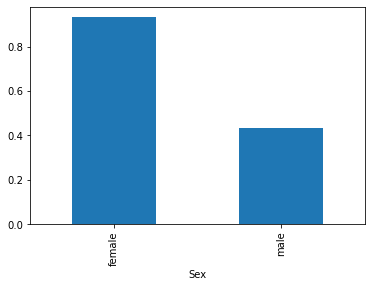

In [225]:
no_missing = train_data.dropna()
no_missing.groupby('Sex')['Survived'].mean().plot(kind = 'bar')

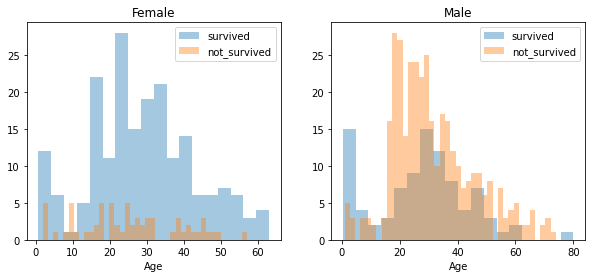

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.set_title('Male')
ax.legend()

In [227]:
k = train_data['Embarked'].value_counts()
frame = k.to_frame('count').reset_index()

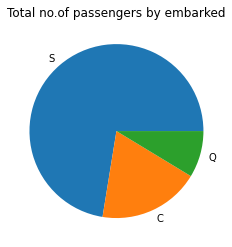

In [228]:
plt.pie(frame['count'], labels = frame['index'])
plt.title("Total no.of passengers by embarked")
plt.show()

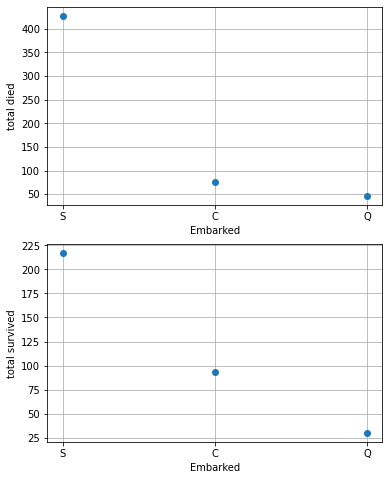

In [229]:
died = train_data['Embarked'][train_data['Survived']==0].value_counts()
survived = train_data['Embarked'][train_data['Survived']==1].value_counts()
plt.figure(figsize = (6,8))
plt.subplot(211)
plt.plot(died,'o')
plt.xlabel('Embarked')
plt.ylabel('total died')
plt.grid()

plt.subplot(212)
plt.plot(survived,'o')
plt.xlabel('Embarked')
plt.ylabel('total survived')
plt.grid()

In [230]:
#probability of dying in each embarked is fallows 
died = train_data['Embarked'][train_data['Survived']==0].value_counts()
survived = train_data['Embarked'][train_data['Survived']==1].value_counts()
#embark_S = d
died, survived  

(S    427
 C     75
 Q     47
 Name: Embarked, dtype: int64,
 S    217
 C     93
 Q     30
 Name: Embarked, dtype: int64)

In [231]:
P_S_Embark_S = 217/(427+217) #probability survival in embark s
P_S_Embark_C = 93/(93+75)
P_S_Embark_Q = 30/(30+47)
print("Probability of survival in Embark_S", P_S_Embark_S)
print("Probability of survival in Embark_C", P_S_Embark_C)
print("Probability of survival in Embark_Q", P_S_Embark_Q)
#so c embark people survived more

Probability of survival in Embark_S 0.33695652173913043
Probability of survival in Embark_C 0.5535714285714286
Probability of survival in Embark_Q 0.38961038961038963


In [232]:
Total_died = train_data['Sex'][train_data['Survived']==0].value_counts()
Total_Survived = train_data['Sex'][train_data['Survived']==1].value_counts()
Total_died, Total_Survived

(male      468
 female     81
 Name: Sex, dtype: int64,
 female    233
 male      109
 Name: Sex, dtype: int64)

In [233]:
print("Probability of men survival :", 109/(109+468))
print("Probability of female survival", 233/(233+81))

Probability of men survival : 0.18890814558058924
Probability of female survival 0.7420382165605095


Text(0.5, 0, 'Age')

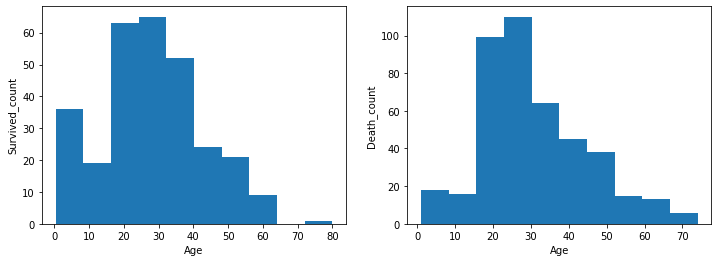

In [234]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(train_data['Age'][train_data['Survived']==1], bins = 10)
plt.ylabel('Survived_count')
plt.xlabel('Age')

plt.subplot(122)
plt.hist(train_data['Age'][train_data['Survived']==0], bins = 10)
plt.ylabel('Death_count')
plt.xlabel('Age')

Text(0.5, 1.0, 'Survived')

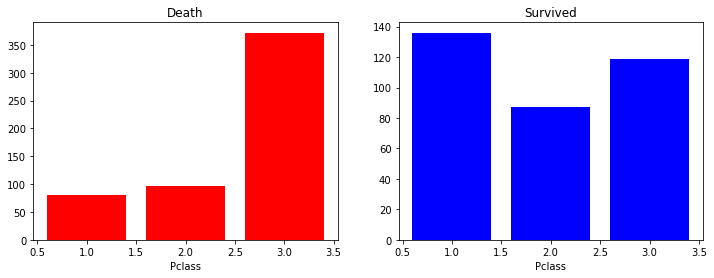

In [235]:
#survival and death by Pclass
death_by_class = train_data['Pclass'][train_data['Survived']==0].value_counts()
survival_by_class = train_data['Pclass'][train_data['Survived']==1].value_counts()
death_by_class = death_by_class.to_frame('count').reset_index()
survival_by_class = survival_by_class.to_frame('count').reset_index()

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(death_by_class['index'], death_by_class['count'], color = 'red')
plt.xlabel('Pclass')
plt.title('Death')
plt.subplot(122)
plt.bar(survival_by_class['index'], survival_by_class['count'], color = 'blue')
plt.xlabel('Pclass')
plt.title('Survived')

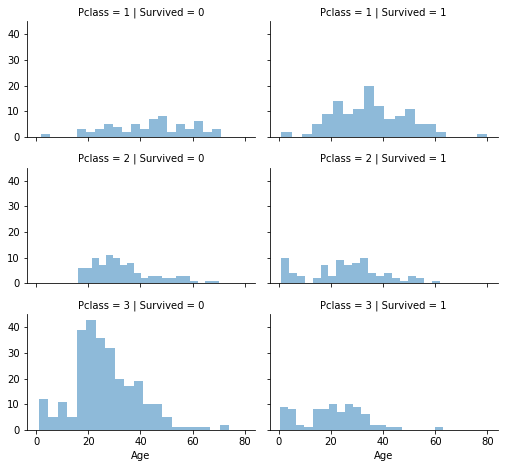

In [236]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
import warnings
warnings.filterwarnings('ignore')

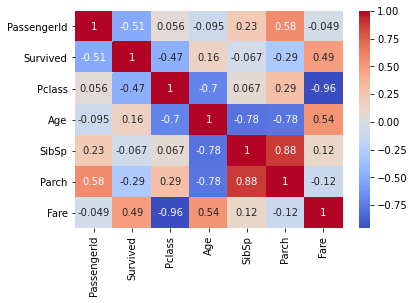

In [237]:
sns.heatmap(train_data.iloc[0:8].corr(), annot = True, cmap = 'coolwarm')

# Data Preprocessing

In [238]:
train_data.drop(['PassengerId'], axis = 1, inplace = True)

In [239]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Missing data

In [240]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [241]:
datasets = [train_data, test_data]
avg_age = train_data['Age'].sum()/714
train_data['Age'].fillna(avg_age, inplace = True)
train_data.isnull().sum()
#Missing age data cleared

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [242]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [243]:
train_data['Embarked'].fillna('S', inplace = True)
train_data.isnull().sum()
#Missing embarked data cleared

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [244]:
train_data.drop(columns = ['Cabin','Ticket','Name'], inplace = True)
train_data.Sex[train_data.Sex == 'male'] =1
train_data.Sex[train_data.Sex == 'female'] =0
train_data.Embarked[train_data.Embarked == 'S'] =0
train_data.Embarked[train_data.Embarked == 'C'] =1
train_data.Embarked[train_data.Embarked == 'Q'] =2

In [245]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [253]:
x = train_data.drop(columns = ['Survived'])
y = train_data['Survived']

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.2)

In [254]:
x_train.shape, y_train.shape

((712, 7), (712,))

In [255]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [256]:
predicted_values = neigh.predict(x_test)
predicted_values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [259]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predicted_values)
score

0.6703910614525139

In [260]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight = 'balanced')

In [261]:
classifier.fit(x_train,y_train)
pred_values = classifier.predict(x_test)
pred_values

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [262]:
score = accuracy_score(y_test,pred_values)
score

0.8156424581005587

(179, 7)